# Importing Libraries
- In this section, we import all the necessary libraries for data analysis.

In [1]:
import os
import cv2
import matplotlib.pyplot as plt
import seaborn as sns
import pandas as pd
import numpy as np

### Defining Directories and Classes
- Here, we define the path to the data and the classes that will be analyzed.

In [2]:
data_dir = "../cherry-leaves/"
classes = ['healthy', 'powdery_mildew']

### Counting Images per Class
- In this step, we count how many images exist in each class.

In [3]:
image_counts = {}
for cls in classes:
    folder = os.path.join(data_dir, cls)  # Construct the full path to the class folder
    files = [f for f in os.listdir(folder) if f.lower().endswith(('.jpg', '.jpeg', '.png'))]  # List image files
    image_counts[cls] = len(files)  # Store the count of images in the dictionary
    print(f"Total images in {cls}: {len(files)}") 

Total images in healthy: 2104
Total images in powdery_mildew: 2104


### Visualization of Image Distribution per Class
- We use a bar chart to visualize how many images exist in each class.

/tmp/ipykernel_9238/2023667415.py:3: FutureWarning: 

Passing `palette` without assigning `hue` is deprecated and will be removed in v0.14.0. Assign the `x` variable to `hue` and set `legend=False` for the same effect.

  sns.barplot(x='Class', y='Quantity', data=df_counts, palette='viridis')  # Using seaborn for better visualization


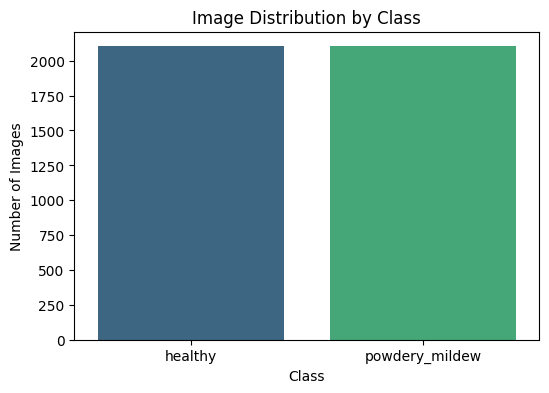

In [4]:
df_counts = pd.DataFrame(list(image_counts.items()), columns=['Class', 'Quantity'])
plt.figure(figsize=(6, 4))
sns.barplot(x='Class', y='Quantity', data=df_counts, palette='viridis')  # Using seaborn for better visualization
plt.title("Image Distribution by Class")
plt.xlabel("Class")
plt.ylabel("Number of Images")
plt.show() 


### Visualization of Image Samples
- We display a sample image from each class to check the quality and content of the data.

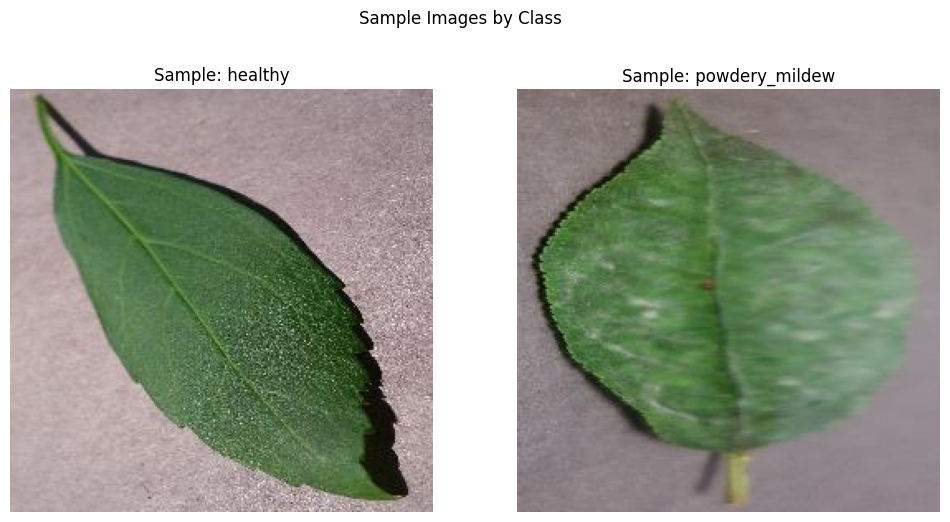

In [5]:
fig, axes = plt.subplots(1, 2, figsize=(12, 6)) 
for i, cls in enumerate(classes):
    folder = os.path.join(data_dir, cls)  # Constructing the path to the class folder
    files = [f for f in os.listdir(folder) if f.lower().endswith(('.jpg', '.jpeg', '.png'))]  # Listing image files
    if files:
        sample_image_path = os.path.join(folder, files[0])  # Selecting the first image as a sample
        image = cv2.imread(sample_image_path)  # Reading the image using OpenCV
        image_rgb = cv2.cvtColor(image, cv2.COLOR_BGR2RGB)
        axes[i].imshow(image_rgb)
        axes[i].set_title(f"Sample: {cls}")
        axes[i].axis('off')

plt.suptitle("Sample Images by Class")
plt.show()

### Calculation of the Average Image for Each Class
- In this section, we calculate and visualize the average image for each class, which can help identify general patterns in the images.

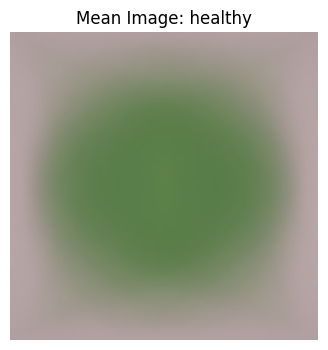

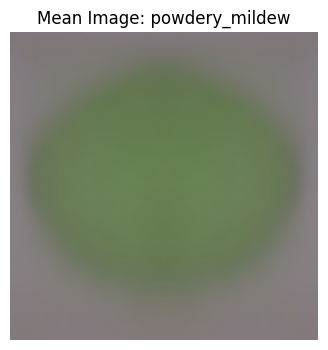

In [6]:
for cls in classes:
    folder = os.path.join(data_dir, cls)
    files = [f for f in os.listdir(folder) if f.lower().endswith(('.jpg', '.jpeg', '.png'))] 
    sum_image = None 
    count = 0

    for f in files:
        image = cv2.imread(os.path.join(folder, f))
        image = cv2.resize(image, (128, 128))
        image = image.astype(np.float32)
        
        if sum_image is None:
            sum_image = image 
        else:
            sum_image += image
        count += 1 
    mean_image = (sum_image / count).astype(np.uint8)

    plt.figure(figsize=(4, 4))
    plt.imshow(cv2.cvtColor(mean_image, cv2.COLOR_BGR2RGB))
    plt.title(f"Mean Image: {cls}")
    plt.axis('off')
    plt.show()
